# 项目：调查tmdb-movies数据集(updated 2018-05-20)

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
>本次分析的数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房等信息。

>探索问题描述:

>1.对于数据集中的每一年，该年度评分最高的电影是哪一部？

>1.1对于每一年评分最高的电影，这些电影的类型集中在哪些类型？

>2.按照不同的年份分组，根据调整过的预算和收益，电影的毛利润有什么趋势？

>3.按照不同的年份分组，电影的受欢迎度有什么不同？

>4.按照不同的年份分组，电影的发行数量是否越来越多了？

>5.根据上映年份的不同，每年的平均毛利润和每年的平均评分有什么关系？

>6.根据上映年份的不同，每年电影的平均评分走势是如何？

>7.最常被用来描述电影的关键字是什么？

>*参考或使用的网站、书籍、论坛、博客帖子、GitHub 代码库等的列表:

>https://seaborn.pydata.org/

>https://amueller.github.io/word_cloud/

>https://matplotlib.org/index.html

>https://github.com/ShiChJ/DAND-QA/blob/master/Intro-DataAnalysis/Project-Data/Investigate_a_Dataset-zh.ipynb

>https://github.com/ShiChJ/DAND-QA/tree/master/Intro-DataAnalysis/Project-Data/Data-Dict

## 导入常用工具

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style="whitegrid")
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

### 常规属性

#### 读取CSV文件/删除与我们提问无关的列

In [2]:
#load file
df=pd.read_csv("tmdb-movies.csv")
#drop irrelevant columns
df.drop(['cast','homepage','tagline','overview','director','production_companies','release_date','budget','revenue'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


#### 查看前10行的数据信息

In [3]:
df.head()

,id,imdb_id,popularity,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 查看后10行的数据信息

In [4]:
df.tail()

,id,imdb_id,popularity,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,The Endless Summer,surfer|surfboard|surfing,95,Documentary,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,Grand Prix,car race|racing|formula 1,176,Action|Adventure|Drama,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,Beregis Avtomobilya,car|trolley|stealing car,94,Mystery|Comedy,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,"What's Up, Tiger Lily?",spoof,80,Action|Comedy,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,Manos: The Hands of Fate,fire|gun|drive|sacrifice|flashlight,74,Horror,15,1.5,1966,127642.279154,0.0


>budget列、revenue列、budget_adj列、revenue_adj列都存在为0的数值。

>homepage列和tagline列有缺失值。

#### 查看数据集的行数和列数

In [5]:
print("Columns:",df.shape[0],"Rows:",df.shape[1])

Columns: 10866 Rows: 12


#### 查看数据的类型，以及数据集是否有存在缺失值

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
original_title    10866 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1018.8+ KB


>keywords和genres存在缺失值。

>budget列、revenue列、budget_adj列、revenue_adj列都存在为0的数值。我们后续会处理它。

#### 数据是否有重复行

In [7]:
df.duplicated().idxmax()

2090

#### 获得重复行的电影名称

In [8]:
df.iloc[2090,3:4]

original_title    TEKKEN
Name: 2090, dtype: object

#### 查看重复行的信息

In [9]:
df.query("original_title == 'TEKKEN'")

,id,imdb_id,popularity,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,TEKKEN,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,TEKKEN,martial arts|dystopia|based on video game|mart...,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


>这两行的信息是完全重复的，重复的信息会影响我们后续的统计，所以我们在后续会删除重复的行。

### 数据清理

>keywords和genres存在缺失，正好，我们此次研究的问题和这两列有关系，但是我们无法得知缺失的值，这些缺失值也不能用平均值或者中位数来替代。

>最后，我打算所以用" "(空格)填补，以免对后续分析造成影响。

In [11]:
#fill NaN Value
df.fillna(value=" ",inplace=True)

#### 查看对缺失值的处理是否成功

In [12]:
df.isnull().any()

id                False
imdb_id           False
popularity        False
original_title    False
keywords          False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

#### 按年分组，查看budget_adj列和revenue_adj列的统计性数值

In [13]:
df.groupby("release_year").describe()[["budget_adj","revenue_adj"]]

budget_adj                                                      \
                  count          mean           std  min  25%           50%   
release_year                                                                  
1960               32.0  5.082036e+06  1.633279e+07  0.0  0.0  0.000000e+00   
1961               31.0  1.085687e+07  1.551230e+07  0.0  0.0  0.000000e+00   
1962               32.0  1.232693e+07  2.862812e+07  0.0  0.0  0.000000e+00   
1963               34.0  1.535687e+07  4.354751e+07  0.0  0.0  0.000000e+00   
1964               42.0  6.608980e+06  1.999008e+07  0.0  0.0  0.000000e+00   
1965               35.0  1.388168e+07  3.195159e+07  0.0  0.0  0.000000e+00   
1966               46.0  8.405522e+06  2.315491e+07  0.0  0.0  0.000000e+00   
1967               40.0  1.644849e+07  3.403110e+07  0.0  0.0  0.000000e+00   
1968               39.0  1.156367e+07  2.088939e+07  0.0  0.0  0.000000e+00   
1969               31.0  8.078272e+06  1.694090e+07  0.0  0.0  0.000000e+00   
1970               41.0  1.739252e+07  3.542332e+07  0.0  0.0  0.000000e+00   
1971               55.0  7.441067e+06  1.719664e+07  0.0  0.0  0.000000e+00   
1972               40.0  4.729510e+06  8.817016e+06  0.0  0.0  0.000000e+00   
1973               55.0  5.821133e+06  1.461160e+07  0.0  0.0  0.000000e+00   
1974               47.0  7.242196e+06  1.426383e+07  0.0  0.0  0.000000e+00   
1975               44.0  5.182556e+06  1.237889e+07  0.0  0.0  0.000000e+00   
1976               47.0  9.958339e+06  2.449853e+07  0.0  0.0  0.000000e+00   
1977               57.0  1.019876e+07  1.999610e+07  0.0  0.0  0.000000e+00   
1978               65.0  1.074791e+07  2.716819e+07  0.0  0.0  0.000000e+00   
1979               57.0  1.343162e+07  2.800161e+07  0.0  0.0  0.000000e+00   
1980               78.0  1.229729e+07  2.651335e+07  0.0  0.0  0.000000e+00   
1981               82.0  1.093101e+07  1.836808e+07  0.0  0.0  1.942535e+05   
1982               81.0  1.221309e+07  2.092801e+07  0.0  0.0  0.000000e+00   
1983               80.0  1.420610e+07  2.248933e+07  0.0  0.0  2.955571e+01   
1984              105.0  1.457759e+07  2.308462e+07  0.0  0.0  1.679234e+06   
1985              109.0  1.392460e+07  2.139916e+07  0.0  0.0  2.310969e+02   
1986              121.0  1.158350e+07  1.729377e+07  0.0  0.0  0.000000e+00   
1987              125.0  1.089202e+07  1.688065e+07  0.0  0.0  0.000000e+00   
1988              145.0  1.176718e+07  2.070948e+07  0.0  0.0  0.000000e+00   
1989              137.0  1.386204e+07  2.262713e+07  0.0  0.0  0.000000e+00   
1990              132.0  1.630870e+07  2.646166e+07  0.0  0.0  0.000000e+00   
1991              133.0  1.765094e+07  2.792901e+07  0.0  0.0  0.000000e+00   
1992              133.0  1.684615e+07  2.518927e+07  0.0  0.0  0.000000e+00   
1993              178.0  1.509155e+07  2.327317e+07  0.0  0.0  6.037880e+00   
1994              184.0  1.782289e+07  2.795058e+07  0.0  0.0  0.000000e+00   
1995              175.0  2.343420e+07  3.633370e+07  0.0  0.0  5.008384e+06   
1996              204.0  2.512641e+07  3.302340e+07  0.0  0.0  6.603530e+06   
1997              192.0  3.361543e+07  4.513381e+07  0.0  0.0  1.630152e+07   
1998              210.0  2.866274e+07  4.151501e+07  0.0  0.0  1.906216e+06   
1999              224.0  3.369195e+07  4.333113e+07  0.0  0.0  1.439958e+07   
2000              227.0  3.209074e+07  4.005310e+07  0.0  0.0  1.519551e+07   
2001              242.0  2.871069e+07  3.951426e+07  0.0  0.0  8.620417e+06   
2002              266.0  2.686408e+07  3.766903e+07  0.0  0.0  1.060729e+07   
2003              281.0  2.632182e+07  4.137288e+07  0.0  0.0  4.741411e+06   
2004              307.0  2.696341e+07  4.222914e+07  0.0  0.0  5.772227e+06   
2005              364.0  2.252539e+07  3.714250e+07  0.0  0.0  2.903065e+06   
2006              408.0  1.936979e+07  3.629430e+07  0.0  0.0  5.408346e+05   
2007              438.0  1.833353e+07  3.751810e+07  0.0  0.0  

>首先，我们可以看到，每年budget_adj和revenue_adj的MIN值都存在0。

>根据实际，我觉得一个电影的制作成本和收益等于0是不切实际的。

>并且后期，我们需要分析毛利润，所以，最好还是把0替换掉。

>因为我无法得知一部电影的成本和收益，所以我准备对于存在0的数值，都用平均值去替代。

In [14]:
#replace 0 value
df["budget_adj"]=df["budget_adj"].replace(0,df["budget_adj"].mean())
df["revenue_adj"]=df["revenue_adj"].replace(0,df["revenue_adj"].mean())

#### 查看是否处理成功

In [15]:
print((df["budget_adj"]==0).sum(),(df["revenue_adj"]==0).sum())

0 0


#### 删除重复行

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

#### 创建名为gross_profit_adj的列，代表了电影的毛利润

In [18]:
#create a new columns named gross_profit_adj
df["gross_profit_adj"]=df["revenue_adj"]-df["budget_adj"]

#### 确认更改

In [19]:
df.head()

,id,imdb_id,popularity,original_title,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit_adj
0,135397,tt0369610,32.985763,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,Furious 7,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## 探索性数据分析

### 研究问题 1
### 数据集中的每一年，评分最高的电影是哪部？

#### 按年分组，查看vote_average列和vote_count列的统计性数值

In [20]:
#group the data by release year and then call describe()
df.groupby("release_year").describe()[["vote_average","vote_count"]]

vote_average                                                    \
                    count      mean       std  min    25%   50%    75%  max   
release_year                                                                  
1960                 32.0  6.325000  0.863974  4.9  5.850  6.25  7.000  8.0   
1961                 31.0  6.374194  0.690395  4.6  6.050  6.30  6.900  7.5   
1962                 32.0  6.343750  0.752603  4.9  5.800  6.45  6.925  7.7   
1963                 34.0  6.329412  0.636529  5.0  5.925  6.35  6.700  7.5   
1964                 42.0  6.211905  0.751974  4.6  5.700  6.40  6.775  7.7   
1965                 35.0  6.194286  0.719045  4.4  5.750  6.30  6.600  7.6   
1966                 46.0  6.128261  0.960246  1.5  5.700  6.00  6.700  7.9   
1967                 40.0  6.242500  0.819596  4.6  5.500  6.25  6.900  7.6   
1968                 39.0  6.379487  0.601393  5.4  5.950  6.30  6.900  7.7   
1969                 31.0  5.961290  0.901361  3.9  5.400  6.00  6.700  7.3   
1970                 41.0  6.417073  0.774565  3.0  6.200  6.50  6.700  7.6   
1971                 55.0  6.420000  0.780171  2.9  6.100  6.50  7.000  7.7   
1972                 40.0  6.535000  0.688570  5.3  6.000  6.50  7.000  8.3   
1973                 55.0  6.703636  0.633907  4.8  6.500  6.80  7.050  7.7   
1974                 47.0  6.395745  0.749770  4.8  6.000  6.40  6.850  8.1   
1975                 44.0  6.390909  0.748275  3.8  5.900  6.40  6.925  8.0   
1976                 47.0  6.340426  0.728208  4.6  5.900  6.40  6.900  7.8   
1977                 57.0  6.147368  0.748357  4.6  5.700  6.10  6.500  7.9   
1978                 65.0  6.130769  0.891789  3.1  5.800  6.10  6.700  8.0   
1979                 57.0  6.308772  0.928763  3.0  5.900  6.20  7.000  7.8   
1980                 78.0  6.160256  0.732606  3.6  5.800  6.20  6.500  8.0   
1981                 82.0  6.165854  0.785080  4.2  5.800  6.25  6.600  8.5   
1982                 81.0  6.241975  0.848213  3.0  5.700  6.20  7.000  7.9   
1983                 80.0  5.971250  1.031429  2.7  5.300  6.10  6.625  8.1   
1984                105.0  6.003810  0.887187  3.6  5.600  6.10  6.600  8.4   
1985                109.0  6.177064  0.761654  4.3  5.700  6.20  6.700  8.3   
1986                121.0  6.004959  0.849397  3.5  5.400  6.10  6.600  8.0   
1987                125.0  6.128800  0.848321  2.8  5.800  6.20  6.700  7.7   
1988                145.0  5.965517  0.839509  3.8  5.500  6.00  6.600  8.0   
1989                137.0  6.070073  0.856151  2.3  5.500  6.00  6.700  8.4   
1990                132.0  5.993939  0.776148  3.8  5.400  6.00  6.500  8.0   
1991                133.0  6.014286  0.838572  3.1  5.500  6.00  6.600  7.9   
1992                133.0  6.081203  0.779194  4.0  5.600  6.10  6.600  8.4   
1993                178.0  6.050000  0.911462  3.4  5.500  6.10  6.775  8.1   
1994                184.0  5.942391  0.882276  3.9  5.300  6.00  6.500  8.4   
1995                175.0  6.056000  0.886655  3.5  5.400  6.10  6.700  8.5   
1996                204.0  5.900980  0.847424  3.3  5.375  5.95  6.500  7.9   
1997                192.0  5.988542  0.811484  3.2  5.400  6.00  6.500  7.8   
1998                210.0  5.970476  0.872210  2.9  5.400  6.10  6.600  8.0   
1999                224.0  6.032589  0.900205  3.4  5.475  6.10  6.600  8.1   
2000                227.0  5.882379  0.894649  3.5  5.300  5.90  6.400  8.5   
2001                242.0  5.896281  0.856430  3.6  5.400  5.90  6.500  8.0   
2002                266.0  5.973308  0.818836  3.3  5.500  6.00  6.500  8.3   
2003                281.0  5.930961  0.851219  3.4  5.300  6.00  6.500  8.0   
2004                307.0  5.988599  0.850663  2.1  5.500  6.00  6.600  7.8   
2005                364.0  5.866484  0.921657  2.5  5.275  5.90  6.500  8.3   
2006                408.0  5.941422  0.863212  2.8  5.300  6.00  6.500  8.7   
2007                438.0  5.964384  0.906277  1.5  5.400  6.00

> 我们可以看到,发行日期在1960的最高vote_average是8.0，投票次数（vote_count）最高是1180次。一直到2015年，都有显示相关的数值。

#### 为每年的vote_average列创建箱线图

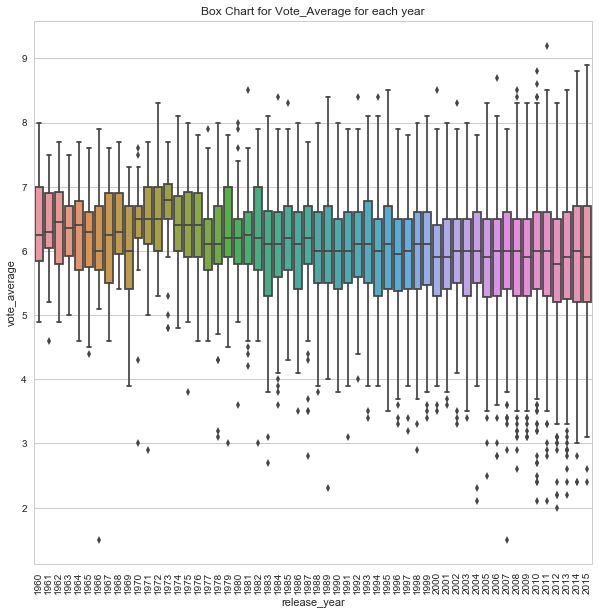

In [21]:
#set figure size to 10 x 10
plt.figure(figsize=(10,10))
#rotate the x labels
plt.xticks(rotation='vertical')
plt.title("Box Chart for Vote_Average for each year")
ax = sns.boxplot(x="release_year", y="vote_average", data=df)

><i><b>Interpret the key results:</b></i>

> 1.The above boxplot of average vote of movies in different release year,shows that the median average vote is around 6.1 and up to around 6.8 varies from each different year.

> 2.Varies from each different year,most movies have a average vote that is around 5.2 and up to around 7.1,however some movies have average vote that are as low as 3 and as high as 8.8.

> 3.The average vote is normal distribution for most.However, few are right-skewed and few are left-skewed.

> 4.There are few outliers for the majority of release year.

#### 为每年的vote_count列创建箱线图

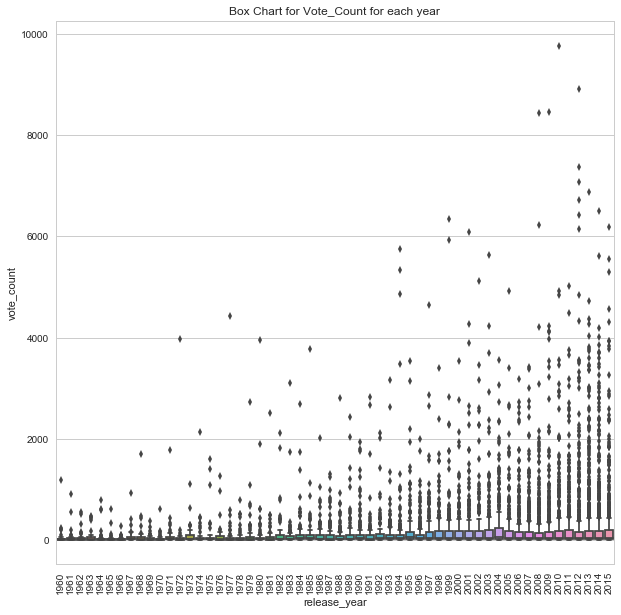

In [21]:
#set figure size to 10,10 to be more clear because lots of data here.
plt.figure(figsize=(10,10))
plt.xticks(rotation='vertical')
plt.title("Box Chart for Vote_Count for each year")
ax = sns.boxplot(x="release_year", y="vote_count", data=df)

><i><b>Interpret the key results:</b></i>

> Above chart shows the boxplot for vote_count for each release year.

> The most important information we can get from this boxplot for vote count is that there are plenty of outliers for each release year.

> Also median is located at the bottom of this boxplot chart for each year.

> At the same time,for example,have a look at year 2015, we can find that some vote count are as high as around 6100,5900 but some are as low as at the bottom.

### 创建名为df_vote的数据集，vote_count按大于平均vote_count筛选，把每年vote_average最高的电影添加进去。

In [22]:
#Create four empty lists which will be used in next For Loop to contain the data for the year ,the title , the vote_average and the genres of highest vote_average movies.
max_year_list=[]
max_title_list=[]
max_vote_average_list=[]
max_genres=[]

#Use For loop,firstly,filter the movie as per a condition which is vote_count greater than average vote_count.
#Secondly append the year to max_year_list
#Thirdly,use idxmax() to get the index of max vote_average,use DataFrame.iloc to get the details of column,use index to get the title.
#Fourthly,use idxmax() to get the index of max vote_average,use DataFrame.iloc to get the details of column,use index to get the vote_average.
#Finally,use idxmax() to get the index of max vote_average,use DataFrame.iloc to get the details of column,use index to get the genres.
for _ in sorted(df["release_year"].unique()):
    df_new=df[(df["release_year"] == _) & (df["vote_count"] > df["vote_count"].mean())]
    max_year_list.append(_)
    max_title_list.append(df.iloc[df_new["vote_average"].idxmax()][3])
    max_vote_average_list.append(df.iloc[df_new["vote_average"].idxmax()][8])
    max_genres.append(df.iloc[df_new["vote_average"].idxmax()][6])

#Use Pandas DataFrame to create a new DataFrame for the max vote_average movies of each year.
df_vote=pd.DataFrame({
    "Year":max_year_list,
    "Title":max_title_list,
    "Vote_Average":max_vote_average_list,
    "Genres":max_genres
})

#### 为每年最高评分的电影创建条形图

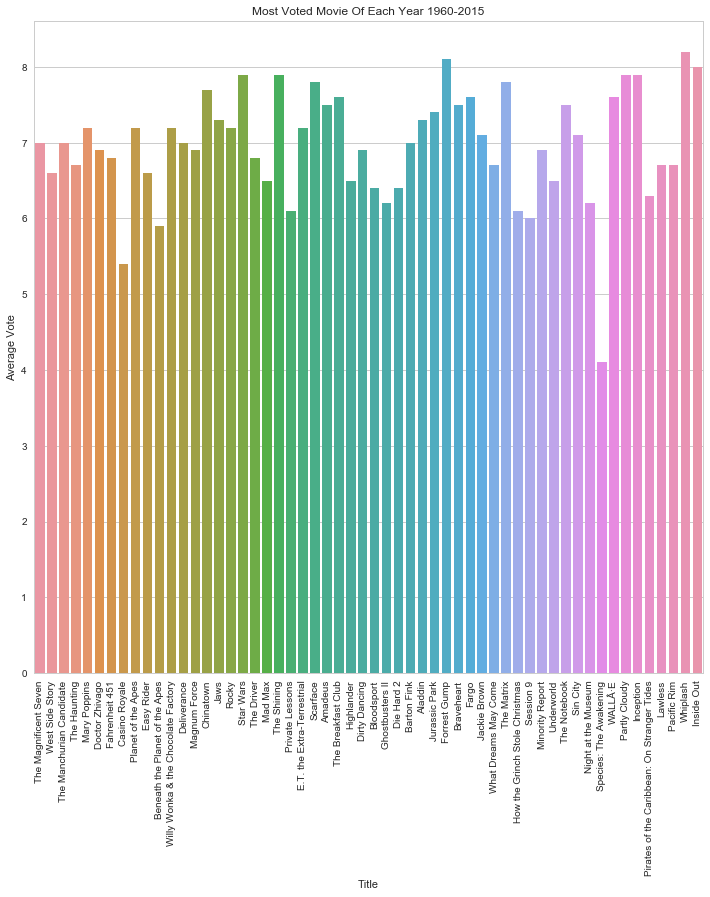

In [23]:
# y axis data
vote_average=df_vote["Vote_Average"]
# x axis data
movie_title=df_vote["Title"]
#pass movie_title to width
width=movie_title
#pass vote_average to heights
heights=vote_average
plt.figure(figsize=(12,12))
sns.barplot(width,heights)
plt.xticks(rotation='vertical')
plt.title("Most Voted Movie Of Each Year 1960-2015")
plt.xlabel("Title")
plt.ylabel("Average Vote");

><i><b>Interpret the key results:</b></i>

>Above barchart clearly shows the highest average vote movies for each year in dataset after filter by vote_count greater than mean vote_count.
>Year 2015 - Inside Out,Year 2014 - Whiplash,Year 2013 - Pacific Rim,etc.

>And also,we can compare the hightest average vote movie for each different year.

>Among all release year,We can see from this chart that Year 2014 has the most hisghest average vote movie - Whiplash while Year 2007 has the most lowest average vote movie - Species:The Awakening.

>What's more, we can find that only 3 movies with average vote below 6, all others movies are above/at 6.

### 研究问题1.1
### 对于每一年的高评分电影，类型集中在哪些类型？

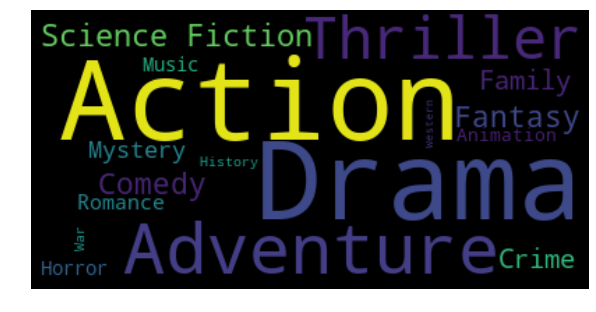

In [24]:
wordcloud_max_genres = WordCloud(max_font_size=80).generate('|'.join(df_vote["Genres"]))
WordCloud.generate_from_frequencies
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_max_genres, interpolation='bilinear')
plt.axis("off");

><i><b>Interpret the key results:</b></i>

>Above WordCloud visualizes the genres of highest average vote movie of each year.

>The most frequently described genres has the biggest font size.

>We can see from this chart that word - Action/Drama/Adventure has bigger font size than other words.

>It means the genres of most movies with highest average vote here are kind of Action/Drama movies.

### 研究问题 2
### 按照年份分组，根据调整过的预算和收益，电影的毛利润有什么趋势？

In [25]:
df.groupby("release_year")["gross_profit_adj"].describe()

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
1960,32.0,5.584147e+07,6.805127e+07,2.141847e+07,3.381332e+07,3.381332e+07,3.681865e+07,3.539024e+08
1961,31.0,9.321909e+07,2.743239e+08,-1.240126e+07,3.381332e+07,3.381332e+07,3.529398e+07,1.545635e+09
1962,32.0,6.328113e+07,1.001953e+08,-2.072013e+07,3.381332e+07,3.381332e+07,4.116243e+07,4.216943e+08
1963,34.0,5.280552e+07,9.305876e+07,-4.984126e+07,3.381332e+07,3.381332e+07,4.163647e+07,5.439729e+08
1964,42.0,7.909338e+07,1.658472e+08,3.518993e+06,3.381332e+07,3.381332e+07,3.381332e+07,8.534745e+08
1965,35.0,1.086866e+08,2.470806e+08,-5.536451e+07,3.381332e+07,3.381332e+07,3.381332e+07,1.072786e+09
1966,46.0,3.677852e+07,2.754110e+07,-6.955990e+07,3.381332e+07,3.381332e+07,3.381332e+07,1.762585e+08
1967,40.0,1.278615e+08,2.484133e+08,-5.883087e+07,3.381332e+07,3.381332e+07,6.012266e+07,1.319404e+09
1968,39.0,5.574952e+07,6.713963e+07,-1.441656e+07,3.381332e+07,3.381332e+07,4.102057e+07,2.803190e+08


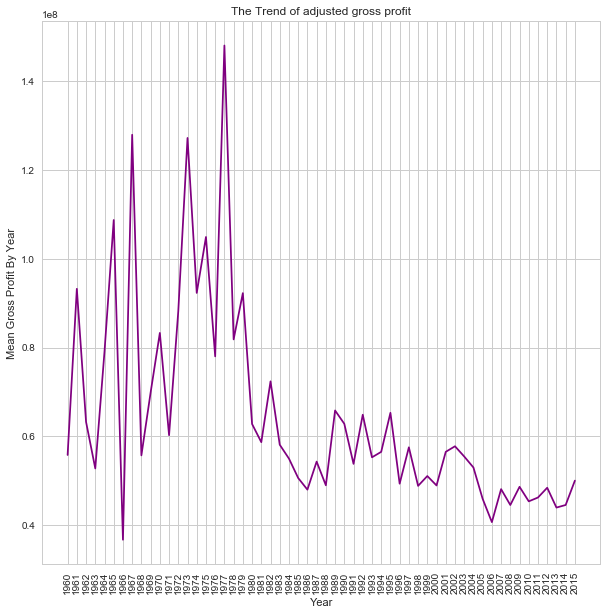

In [26]:
#get the mean gross_profit_adj, group by year.
MeanGrossProfit_byyear=df.groupby("release_year")["gross_profit_adj"].describe()["mean"]
#get the index
IndexYear=MeanGrossProfit_byyear.index
locations=IndexYear
heights=MeanGrossProfit_byyear
labels=IndexYear
plt.figure(figsize=(10,10))
plt.plot(locations,heights,color="purple")
plt.xticks(labels,rotation='vertical')
plt.title("The Trend of adjusted gross profit")
plt.xlabel("Year")
plt.ylabel("Mean Gross Profit By Year");

><i><b>Interpret the key results:</b></i>

>According above line plot,We can see that year 1977 has the highest mean gross profit(peak).

>Year 1966 has the lowest mean gross profit(lowest point).

>The line plot shows a increasing trend from 1960 to 1977.

>The line plot shows a decreasing trend from 1977 to 2015.

### 研究问题 3
### 按照不同的年份分组，电影的受欢迎度有什么趋势？

In [27]:
df.groupby("release_year").describe()['popularity']

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
1960,32.0,0.458932,0.541833,0.055821,0.158091,0.268273,0.434118,2.610362
1961,31.0,0.422827,0.526517,0.027527,0.184113,0.265092,0.388336,2.631987
1962,32.0,0.454783,0.555945,0.038819,0.209852,0.299075,0.521489,3.170651
1963,34.0,0.502706,0.551040,0.045417,0.184746,0.249940,0.655374,2.508235
1964,42.0,0.412428,0.620196,0.008990,0.128546,0.194472,0.366349,3.153791
1965,35.0,0.342587,0.400366,0.004770,0.143120,0.201703,0.323553,1.910465
1966,46.0,0.304112,0.239278,0.034555,0.142370,0.245917,0.391831,1.227582
1967,40.0,0.471154,0.593532,0.034181,0.145091,0.240558,0.508377,2.550704
1968,39.0,0.484202,0.552789,0.005265,0.177678,0.323826,0.665733,3.309196


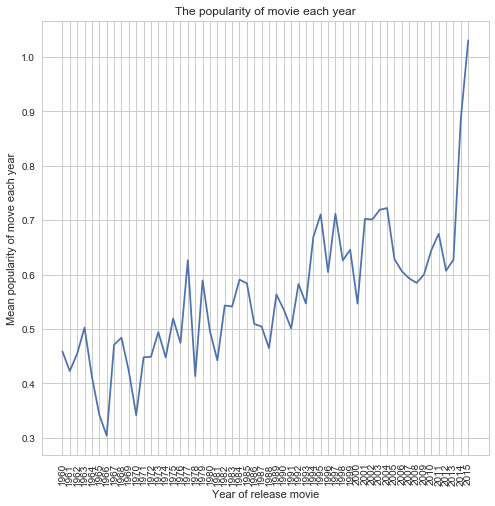

In [28]:
#get the mean of popularity, group by year.
meanofpopularity=df.groupby("release_year").describe()['popularity']['mean']
#get the index - year
index_pop=meanofpopularity.index
locations=index_pop
heights=meanofpopularity
labels=index_pop
plt.figure(figsize=(8,8))
plt.plot(locations,heights)
plt.title("The popularity of movie each year")
plt.xticks(labels,rotation='vertical')
plt.xlabel("Year of release movie")
plt.ylabel("Mean popularity of move each year");

><i><b>Interpret the key results:</b></i>

>According above line plot,We can see that year 2015 has the highest popularity(peak).

>Year 1966 has the lowest popularity(lowest point)

>The line plot shows a increasing trend.

### 研究问题 4
### 按照不同的年份分组，电影的发行数量是否越来越多了？

In [29]:
df.groupby("release_year").count()["id"]

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

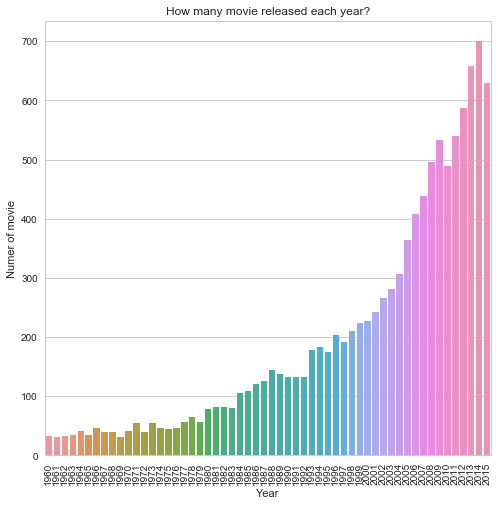

In [30]:
#count the number of movies
count_movie=df.groupby("release_year").count()["id"]
#get the index - year
count_movie_index=count_movie.index
width=count_movie_index
heights=count_movie
plt.figure(figsize=(8,8))
sns.barplot(width,heights,tick_label=width)
plt.xticks(rotation='vertical')
plt.title("How many movie released each year?")
plt.xlabel("Year")
plt.ylabel("Numer of movie");

><i><b>Interpret the key results:</b></i>

>Above barchart shows the total numer of movies each release year.

>As you can see from the chart,year 1969 has the lowest movies released, the number of movies reached a peak at year 2014 - around 700 movies were released at that year.

>According to the trend in the chart, we can almost assume that the number of movies did increased more and more.

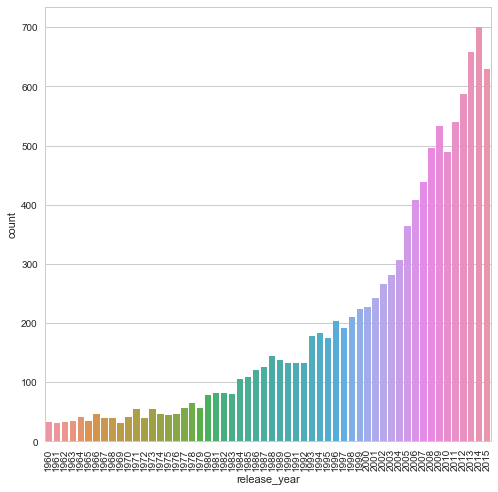

In [36]:
plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical',size=10)
sns.countplot(df["release_year"])

### 研究问题 5
### 根据上映年份的不同，每年的平均毛利润和每年的平均评分有什么关系？

In [35]:
df.groupby("release_year")["gross_profit_adj"].mean()

release_year
1960    5.584147e+07
1961    9.321909e+07
1962    6.328113e+07
1963    5.280552e+07
1964    7.909338e+07
1965    1.086866e+08
1966    3.677852e+07
1967    1.278615e+08
1968    5.574952e+07
1969    6.989098e+07
1970    8.329744e+07
1971    6.028308e+07
1972    8.819693e+07
1973    1.271538e+08
1974    9.228729e+07
1975    1.048768e+08
1976    7.801987e+07
1977    1.479373e+08
1978    8.183305e+07
1979    9.224915e+07
1980    6.280857e+07
1981    5.871663e+07
1982    7.240167e+07
1983    5.814468e+07
1984    5.502166e+07
1985    5.065536e+07
1986    4.804071e+07
1987    5.435076e+07
1988    4.901670e+07
1989    6.585155e+07
1990    6.285334e+07
1991    5.383765e+07
1992    6.489602e+07
1993    5.531325e+07
1994    5.654101e+07
1995    6.532645e+07
1996    4.938032e+07
1997    5.756541e+07
1998    4.888853e+07
1999    5.110056e+07
2000    4.898314e+07
2001    5.654692e+07
2002    5.779781e+07
2003    5.549798e+07
2004    5.302463e+07
2005    4.596957e+07
2006    4.073563e+07


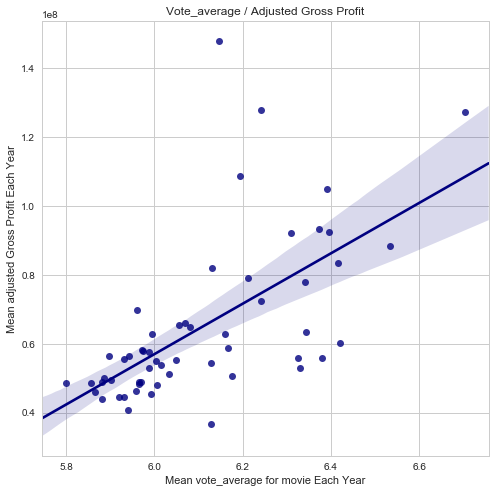

In [45]:
# get the mean of vote_average ,group by year.
mean_vote_average=df.groupby("release_year")["vote_average"].describe()['mean']
# get the mean of gross_profit ,group by year.
men_gross_profit=df.groupby("release_year")["gross_profit_adj"].describe()['mean']
plt.figure(figsize=(8,8))
sns.regplot(x=mean_vote_average,y=men_gross_profit,color="navy")
plt.title("Vote_average / Adjusted Gross Profit")
plt.xlabel("Mean vote_average for movie Each Year")
plt.ylabel("Mean adjusted Gross Profit Each Year");

><i><b>Interpret the key results:</b></i>

> The scatter plot shows a positive liner.

> According to the liner,two variables has stronger relationship.

### vote_count和revenue_adj的关系

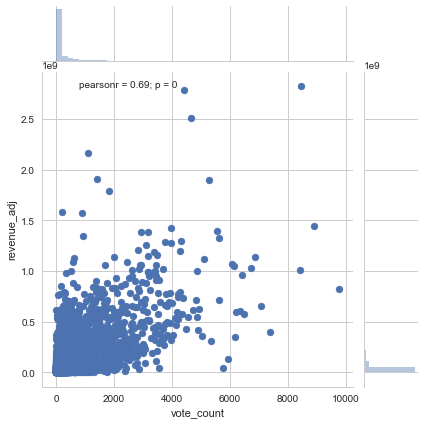

In [25]:
sns.jointplot(x='vote_count', y='revenue_adj',data=df)

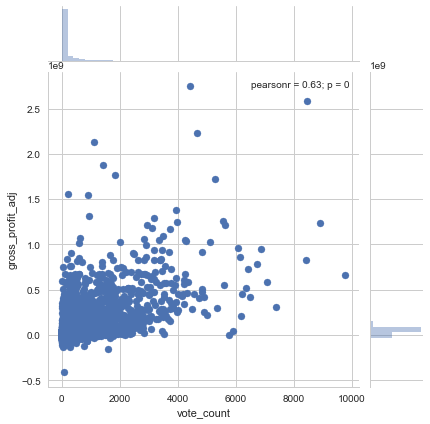

In [28]:
sns.jointplot(x='vote_count', y='gross_profit_adj',data=df)

### 研究问题 6
###  根据上映年份的不同，每年电影的平均评分走势是如何？

In [37]:
df.groupby("release_year")["vote_average"].describe()['mean']

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.417073
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.395745
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.070073
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.056000
1996    5.900980
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.882379
2001    5.896281
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866484
2006    5.941422
2007    5.964384
2008    5.930847
2009    5.856660
2010    5.992843
2011    5.958519
2012    5.799830
2013    5.880577
2014    5.920714
2015    5.885692
Name: mean, dtype: float64

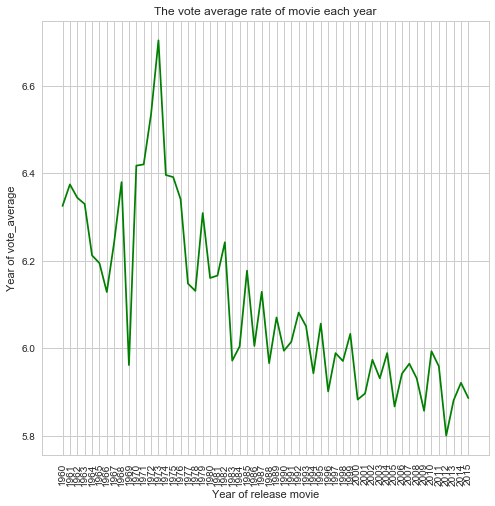

In [38]:
#get the mean of vote_average,group by different release_year
mean_vote_average_byyear=df.groupby("release_year")["vote_average"].describe()['mean']
#get the index - which is year
indexmean_vote=mean_vote_average_byyear.index
locations=indexmean_vote
heights=mean_vote_average_byyear
labels=indexmean_vote
plt.figure(figsize=(8,8))
plt.plot(locations,heights,color="g")
#Set xticks
plt.xticks(labels,rotation='vertical')
#Set title name
plt.title("The vote average rate of movie each year")
#Set description for x label
plt.xlabel("Year of release movie")
#Set description for y label
plt.ylabel("Year of vote_average");

><i><b>Interpret the key results:</b></i>

>According above line plot,We can see that year 1973 has the highest average vote(peak).Year 2012 has the lowest average vote(lowest point)

>The line plot shows a increasing trend from 1960 to 1973.

>The line plot shows a decreasing trend from 1973 to 2015.

### 研究问题 7
### 用来描述电影最常用的关键字是什么？

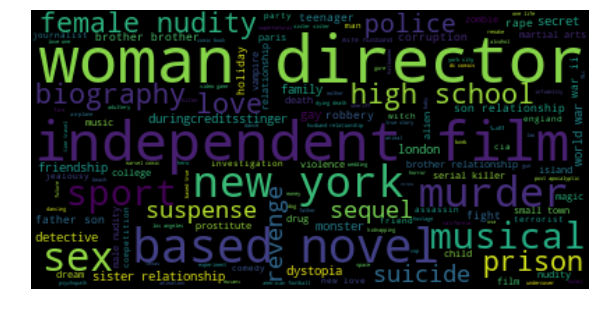

In [39]:
wordcloud_keywords = WordCloud(max_font_size=80).generate('|'.join(df["keywords"]))
WordCloud.generate_from_frequencies
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_keywords, interpolation='bilinear')
plt.axis("off");

><i><b>Interpret the key results:</b></i>

>Above WordCloud visualizes the keywords of all movies.(For those movies without actual keywords in our dataset,are excluded)

>The most frequently used keyword is represented with the biggest font size.

>We can see from this chart that the word - WOMAN & DIRECTOR & INDEPENDENT FILM has the most biggest font size.

>It means that most of our movies use WOMAN & DIRECTOR & INDEPENDENT FILM as a part of their keyword.

### 研究问题 8
### 分析变量之间的关系

In [24]:
#Compute pairwise correlation of columns, excluding NA/null values
df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit_adj
id,1.000000,-0.014351,-0.088368,-0.035555,-0.058391,0.511393,-0.151478,-0.107516,-0.083373
popularity,-0.014351,1.000000,0.139032,0.800828,0.209517,0.089806,0.482812,0.578166,0.532216
runtime,-0.088368,0.139032,1.000000,0.163273,0.156813,-0.117187,0.204831,0.154512,0.123068
vote_count,-0.035555,0.800828,0.163273,1.000000,0.253818,0.107962,0.569200,0.685958,0.632358
vote_average,-0.058391,0.209517,0.156813,0.253818,1.000000,-0.117576,0.087895,0.173241,0.173827
release_year,0.511393,0.089806,-0.117187,0.107962,-0.117576,1.000000,0.020370,-0.064884,-0.078576
budget_adj,-0.151478,0.482812,0.204831,0.569200,0.087895,0.020370,1.000000,0.602136,0.428586
revenue_adj,-0.107516,0.578166,0.154512,0.685958,0.173241,-0.064884,0.602136,1.000000,0.979416
gross_profit_adj,-0.083373,0.532216,0.123068,0.632358,0.173827,-0.078576,0.428586,0.979416,1.000000


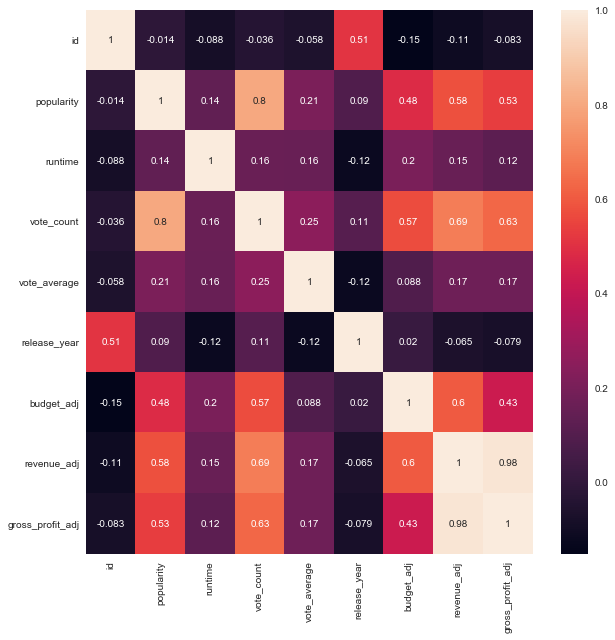

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True);

<a id='conclusions'></a>
## 结论

#### 对于数据集中的每一年，该年度平均评分最高的电影是哪一部？

<li>在2015年，平均评分最高的电影是<i>Inside Out</i>，在2014年，平均评分最高的电影是<i>Whiplash</i>，以此类推，可以通过图表看出所有年份，平均评分最高的电影。</li>

#### 对于每一年评分最高的电影，这些电影的类型集中在哪些类型？

<li>根据词云，出现频率最多的类型，将会以最大的字体显示。因此，我们可以发现，高平均评分的电影，它们的类型，主要为Action和Drama。</li>

#### 按照不同的年份分组，电影的毛利润有什么趋势？

<li>根据现有数据，1966年平均利润是最低的，1977年平均利润是最高的。折线图显示出，从1960年到1977年，平均利润是上升趋势。从1977年到2015年，平均利润是下降趋势。</li>

#### 按照不同的年份分组，电影的受欢迎度有什么不同？

<li>从现有的数据来看，2015年上映的电影在相关页面上被查看的次数最多，1966年上映的电影在相关页面上被查看的次数最少。折线图显示出上升趋势。</li>

#### 按照不同的年份分组，电影的发行数量是否越来越多了？<i>

<li>基于样本，在1969年上映的电影是最少，而在2014年上映的电影是最多，并且图表呈现上升趋势。</li>

#### 根据上映年份的不同，每年的平均毛利润和每年的平均评分有什么关系？

<li>根据图表，我们发现每年的平均毛利润和每年的平均评分有着很强的相关度。</li>

#### 根据上映年份的不同，每年电影的平均评分走势是如何？

<li>基于样本，1960年到1973年的电影评分是呈上升趋势的。然而，从1973年到2015年，是呈下降趋势的。</li>

#### 最常被用来描述电影的关键字是什么？

<li>WOMAN & DIRECTOR & INDEPENDENT FILM 这三个单词/词组，是最常用来描述电影的关键字。</li>

##  局限性
<li>以上结论，是依据数据集里的10865部电影所得出的，因此也仅限于这10865部电影。</li>
<li>毛利润列是由收益减去成本而得出的，然后在原始数据集中，许多电影的收益和成本为0。因此在数据清理过程中，我们用平均值，来填充了这些0值，并计算出毛利润。这和真实会有所出入！</li>
<li>数据集中，存在1493部电影的KEYWORDS为缺失值，因此我们使用的并不是总体数据，我们得出的结论只是相对于其中的9373部电影。在数据清理过程中，我们用空格填充了KEYWORDS，如果我们得知这些缺失值背后正真的KEYWORDS，那么以上的结果可能会非常不同。</li>